In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2 as cv

In [2]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,cache_dir='.',untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


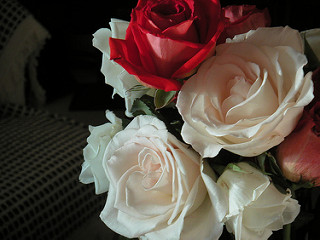

In [7]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

PIL.Image.open(str(roses[1]))

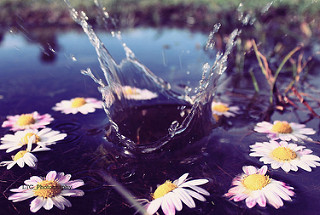

In [8]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))


In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resized_img = cv.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              


In [21]:
model.fit(X_train_scaled, y_train, epochs=10)         

Epoch 1/10
86/86 [==============================] - 99s 1s/step - loss: 1.4034 - accuracy: 0.4219
Epoch 2/10
86/86 [==============================] - 92s 1s/step - loss: 1.0272 - accuracy: 0.5999
Epoch 3/10
86/86 [==============================] - 93s 1s/step - loss: 0.8555 - accuracy: 0.6762
Epoch 4/10
86/86 [==============================] - 95s 1s/step - loss: 0.6576 - accuracy: 0.7573
Epoch 5/10
86/86 [==============================] - 88s 1s/step - loss: 0.4745 - accuracy: 0.8241
Epoch 6/10
86/86 [==============================] - 85s 993ms/step - loss: 0.2922 - accuracy: 0.9052
Epoch 7/10
86/86 [==============================] - 87s 1s/step - loss: 0.1989 - accuracy: 0.9331
Epoch 8/10
86/86 [==============================] - 85s 983ms/step - loss: 0.1246 - accuracy: 0.9655
Epoch 9/10
86/86 [==============================] - 86s 995ms/step - loss: 0.0993 - accuracy: 0.9709
Epoch 10/10
86/86 [==============================] - 82s 952ms/step - loss: 0.0419 - accuracy: 0.9891


In [22]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 9s 271ms/step - loss: 1.8369 - accuracy: 0.6383


[1.8369137048721313, 0.6383442282676697]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 7s 246ms/step


array([[ 6.770182  , 11.886723  , -2.6469858 , -8.466405  , -3.6291769 ],
       [ 8.242254  ,  0.25978225, -7.640475  , -2.5385845 ,  4.06413   ],
       [-4.3026857 , -0.28628618,  9.122961  , -5.6710243 , -4.5683455 ],
       ...,
       [ 2.1157134 ,  2.3319988 , -7.377321  ,  7.3923273 ,  5.90308   ],
       [ 2.1801362 ,  1.754373  ,  2.3259017 , -1.0096188 , -3.3988366 ],
       [ 3.1187408 , -6.048531  , -1.8220918 ,  4.156541  ,  4.426398  ]],
      dtype=float32)

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

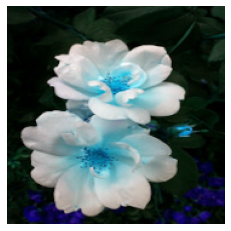

In [33]:
plt.axis('off')
plt.imshow(X[0])

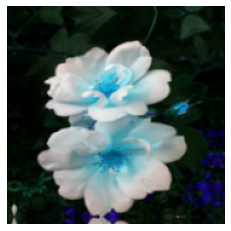

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              

In [ ]:
model2.fit(X_train_scaled, y_train, epochs=10) 

In [ ]:
model2.evaluate(X_test_scaled,y_test)